# BIA 6305ACA Preparation/Analysis for Big Data Fall 2017
## Assignment 3
## Notebook 2
### Stuent:  Leonardo Ji
### 1/28/2018

### Part 2:
* Data munge and prepare reports using dataset Marathon Data (use the data set in this weeks content folder) 
* Add Headers: Name, Jersey Number, Gender, Age, Home Town, Final Time, etc.
* Use either data munging environment you would like (R, Python) Convert all text to caps, do record counts by State, timeline analysis by age (group by)

Produce these reports: 
*  All runners (no percentages) 
*  All male runners 
*  All female runners
*  Which State has the fastest runners by gender

In [2]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 15000) #important for getting all the text
import re
import seaborn as sns
import time
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

In [3]:
cd C:\\Users\\lj015625\\Desktop\\Big Data\\Week3

C:\Users\lj015625\Desktop\Big Data\Week3


### Marathon Data Set
Read text file line by line and dynamically set name and state. Then add each row one by one.

In [4]:
marathon = pd.DataFrame(columns=['Place','Name','Age','Sex/plc','Sex','Time','Pace','City','State'])

In [5]:
us_state = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV',
'WI','WY']

In [6]:
for i, line in enumerate(open('C:/Users/lj015625/Desktop/Big Data/Week3/Marathon Data.txt')):
    tokens = line.split()
    if (len(tokens) > 8):
        j = 0
        place = 0
        if (j < len(tokens) and tokens[j].isdigit()):
            place = int(tokens[j])
            j += 1
        # name can be single token, multiple tokens.   
        name = ''
        while (j < len(tokens) and not tokens[j].isdigit()):
            name = name + ' ' +  tokens[j]
            j += 1
            
        age = 0
        if (j < len(tokens) and tokens[j].isdigit()):
            age = tokens[j]
            j += 1
            
        sexplc = 0;
        if (j < len(tokens)):
            sexplc = int(tokens[j])
            j += 1
            
        sex = ''
        if (j < len(tokens)):
            sex = tokens[j]
            j += 1
            
        finishTime = ''
        if (j < len(tokens)):
            finishTime = tokens[j]
            j += 1
            
        pace = ''
        if (j < len(tokens)):
            pace = tokens[j]
            j += 1
            
        city = ''
        while (j < len(tokens) and not tokens[j] in us_state):
            city = city + ' ' + tokens[j]
            j += 1
        # state is listed in 50 state codes.    
        state = ''
        if (j < len(tokens) and tokens[j] in us_state):
            state = tokens[j]
        
        if (place > 0):
            new_row = [place, name, age, sexplc, sex, finishTime, pace, city, state];  
            marathon.loc[i, :] = new_row


In [7]:
marathon = marathon.reset_index(drop=True)
len(marathon)

1534

In [8]:
marathon['Place'] = marathon.Place.astype(int)
marathon['Sex/plc'] = marathon.Age.astype(int)
marathon['Age'] = marathon.Age.astype(int)

In [9]:
marathon.dtypes

Place       int32
Name       object
Age         int32
Sex/plc     int32
Sex        object
Time       object
Pace       object
City       object
State      object
dtype: object

In [10]:
marathon.head(10)

,Place,Name,Age,Sex/plc,Sex,Time,Pace,City,State
0,1,George Kitonga,27,27,M,2:21:23,5:24,CHAPEL HILL,NC
1,2,Anolrii Toptun,25,25,M,2:21:31,5:25,KIEV,AR
2,3,Sammy Kosgei,32,32,M,2:22:45,5:27,CHAPEL HILL,NC
3,4,Philip Rop,30,30,M,2:23:15,5:29,MOSORIOT,AR
4,5,Alfxev Khokhlov,29,29,M,2:23:54,5:30,KHABONOVSK,AR
5,6,Koen Neven,29,29,M,2:24:16,5:31,RIEMS,
6,7,Ibrahim Limo,28,28,M,2:25:59,5:35,ALBUQUEROVE,NM
7,8,John Spider Sillery,34,34,M,2:27:52,5:39,BALTIMORE,MD
8,9,Justin Banks,26,26,M,2:29:36,5:43,LOUISVILLE,KY
9,10,Przemek Bobrowski,26,26,M,2:32:00,5:49,SEARCY,AR


In [11]:
marathon.tail(10)

,Place,Name,Age,Sex/plc,Sex,Time,Pace,City,State
1524,1525,Jim Ottinger,73,73,M,6:29:01,14:51,VESTAVIA HILLS,AL
1525,1526,Jeanine Cross,46,46,F,6:29:30,14:52,NOBLESVILLE,IN
1526,1527,Michael Miller,41,41,M,6:37:14,15:10,MARION,IL
1527,1528,Amy Harbison,49,49,F,6:37:41,15:11,EVANSVILLE,IN
1528,1529,Tod Schneider,41,41,M,6:38:27,15:13,EVANSVILLE,IN
1529,1530,Steve Kroeger,65,65,M,6:38:31,15:13,ELBERFELD,IN
1530,1531,Ashok Kumar,64,64,M,6:38:48,15:14,MEMPHIS,TN
1531,1532,Michelle Skinner,21,21,F,6:44:26,15:27,MUNCIE,IN
1532,1533,Lucia Patteson,51,51,F,6:47:30,15:34,MEMPHIS,TN
1533,1534,Candace Carpenter,21,21,F,6:47:30,15:34,MUNCIE,IN


#### Runner By State

In [454]:
stateAgg = marathon.groupby('State')['State'].aggregate(len)
stateAgg

State
       25
AL     85
AR    143
AZ      6
CA      6
CO      3
CT      2
DE      2
FL      9
GA     37
HI      1
IA      9
IL     99
IN     48
KS     14
KY     40
LA     55
MA      6
MD      7
ME      2
MI     14
MN     10
MO    110
MS    119
MT      2
NC      8
ND      2
NE      3
NH      2
NJ      3
NM      5
NY     19
OH     21
OK      4
OR      3
PA      8
RI      1
SC      9
SD      2
TN    528
TX     28
UT      4
VA     11
VT      3
WA      5
WI     11
Name: State, dtype: int64

#### Runner by Sex

In [455]:
sexAgg = marathon.groupby('Sex')['Sex'].aggregate(len)
sexAgg

Sex
F    545
M    989
Name: Sex, dtype: int64

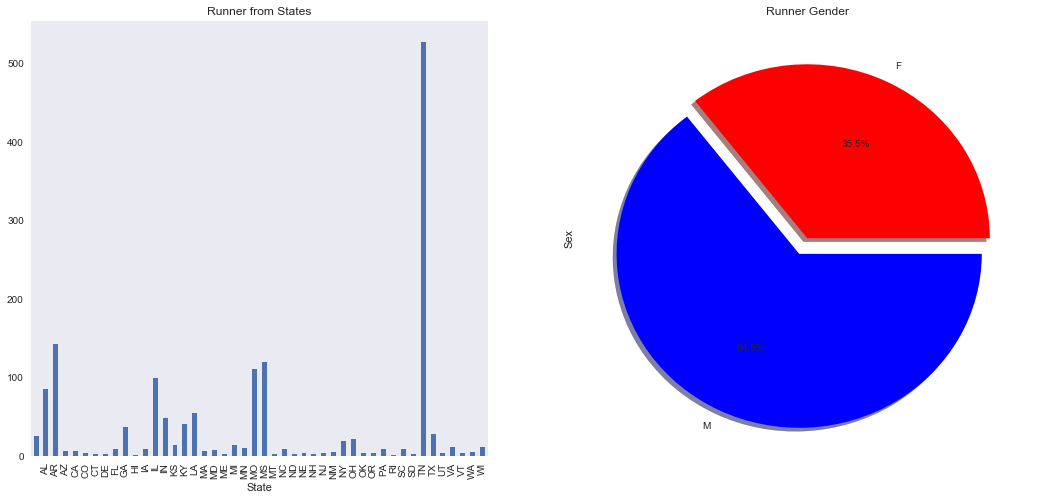

In [456]:
f,ax=plt.subplots(1,2,figsize=(18,8))
stateAgg.plot(kind='bar', grid=False, ax=ax[0])
ax[0].set_title('Runner from States')
sexAgg.plot.pie(colors=['red', 'blue'],explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1],shadow=True)
ax[1].set_title('Runner Gender')

#### Runner by Age

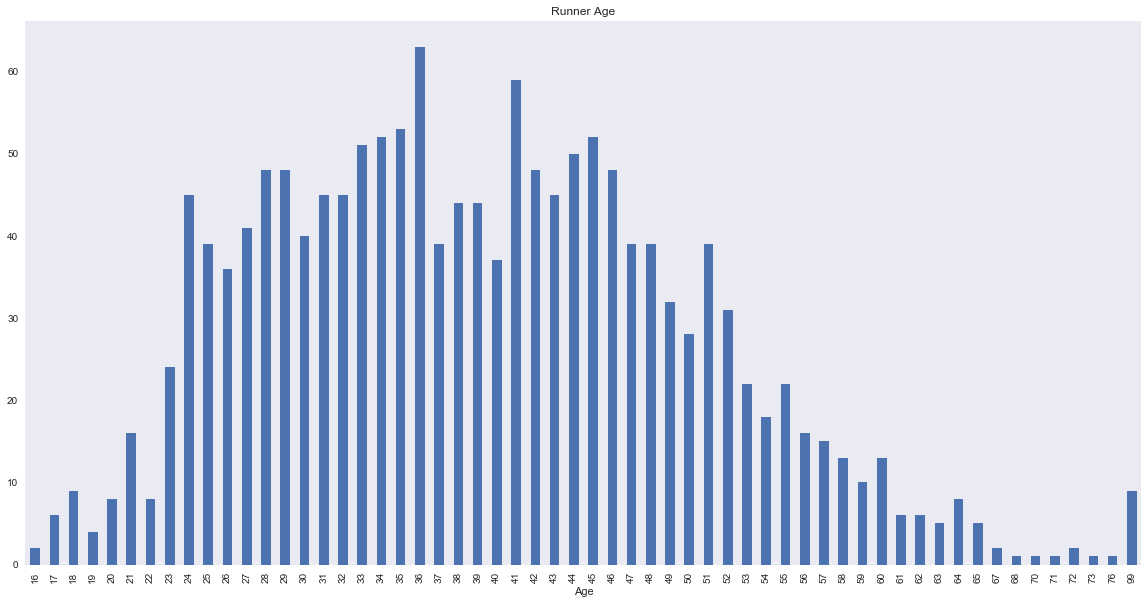

In [457]:
ageAgg = marathon.groupby('Age')['Age'].aggregate(len)
ageAgg.plot(kind='bar', grid=False, figsize=(20,10)).set_title('Runner Age')

#### The state of Ohio has the fastest mean female runner placement.

In [458]:
femaleMarathon = marathon[marathon.apply(lambda marathon: marathon['State'] in us_state and marathon['Sex'] == 'F', axis=1)]
statePlace = femaleMarathon[['State','Sex/plc']].groupby(['State']).mean().sort_values('Sex/plc')

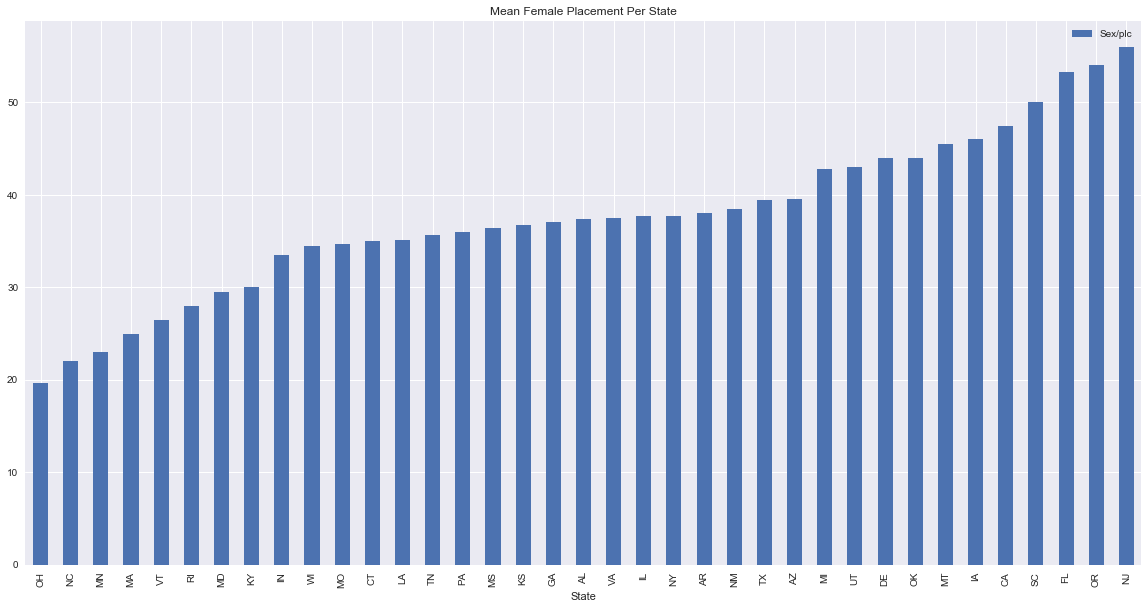

In [459]:
statePlace.plot.bar(figsize=(20,10)).set_title('Mean Female Placement Per State')

#### The state of Maine has the fastest mean male runner placement.

In [462]:
maleMarathon = marathon[marathon.apply(lambda marathon: marathon['State'] in us_state and marathon['Sex'] == 'M', axis=1)]
statePlace = maleMarathon[['State','Sex/plc']].groupby(['State']).mean().sort_values('Sex/plc')

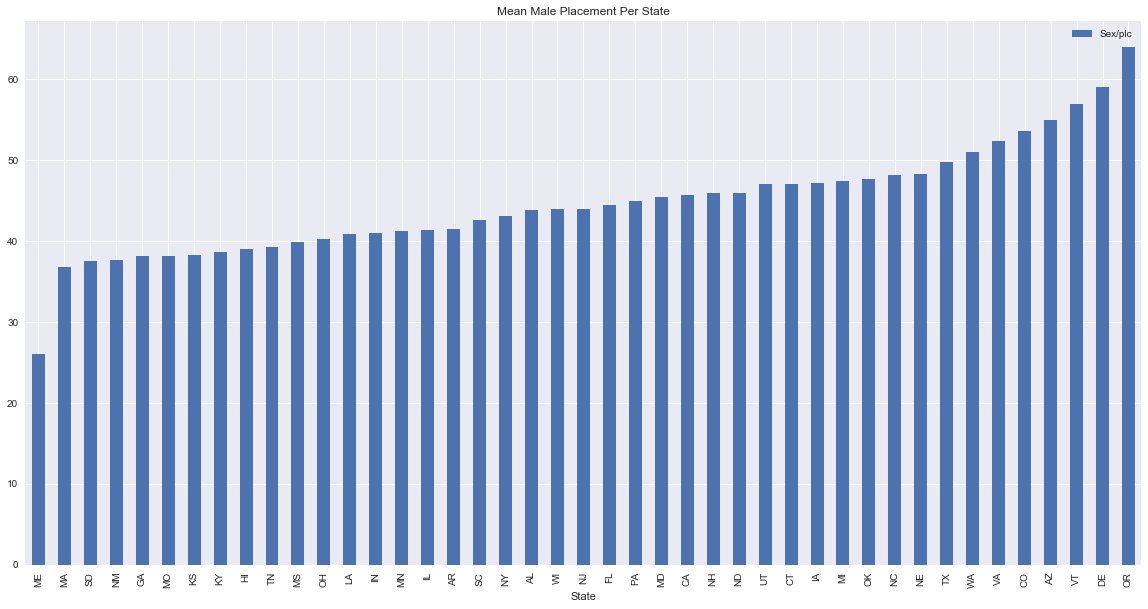

In [463]:
statePlace.plot.bar(figsize=(20,10)).set_title('Mean Male Placement Per State')

### Summary
* Read marathan runner unstructured text data.  
* Produce the aggregrate reports by State, Sex, Age.
* Find the fastest mean female and male runner by state.

### END